In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH_DADOS = "../dados/sexo/"
PATH_ETNIAS = PATH_DADOS + "sexo_processada.csv"
df = pd.read_csv(PATH_ETNIAS, encoding='utf-8', delimiter=';', index_col=0)
df = df.rename(index={'MASCULINO':'M', 'FEMININO':'F'})
df

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
sexo,,,,,,,,,,,,,,,,,,,,,
M,908169,447320,2112128,326495,4356651,431494,800489,3496428,1588657,4456662,...,2000614,8306271,22572327,5641298,3598115,5558470,1393810,1786977,3527872,1466775
F,888291,447150,2095586,304686,4334094,430279,789759,3618170,1692040,4731224,...,2063438,9059918,23717006,5875542,3654387,5864503,1415584,1739243,3588271,1585771


In [3]:
PATH_DADOS = '../dados/processados/'
PATH_SIVEP = PATH_DADOS + 'influd_processado.csv'
df_covid = pd.read_csv(PATH_SIVEP, encoding='UTF-8')
df_covid.head()

,DT_NOTIFIC,SEM_NOT,SG_UF_NOT,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CLASSI_FIN
0,2020-03-04,10,SP,SAO JOSE DOS CAMPOS,354990,M,74,1.0,9.0,5.0
1,2020-03-03,10,SP,AURIFLAMA,350420,F,49,4.0,9.0,5.0
2,2020-03-06,10,DF,BRASILIA,530010,F,52,4.0,9.0,5.0
3,2020-03-04,10,PR,CURITIBA,410690,M,1,9.0,5.0,5.0
4,2020-03-05,10,PE,RECIFE,261160,M,71,4.0,9.0,5.0


In [4]:
df_covid = df_covid[df_covid['CS_SEXO'] != 'I']
df_sexo = df_covid.groupby(['SG_UF_NOT', 'CS_SEXO']).size().reset_index(name='qtd')
df_sexo

,SG_UF_NOT,CS_SEXO,qtd
0,AC,F,52
1,AC,M,97
2,AL,F,503
3,AL,M,677
4,AM,F,2248
5,AM,M,3451
6,AP,F,67
7,AP,M,89
8,BA,F,1335
9,BA,M,1597


In [5]:
def normalizar_por_estado(row):
    estado = row[0]
    sexo = row[1]
    qtd = row[2]
    taxa = (qtd / (df.loc[sexo, estado])) * 100000
    return taxa

df_sexo['taxa'] = df_sexo.apply(normalizar_por_estado, axis=1)
df_sexo

,SG_UF_NOT,CS_SEXO,qtd,taxa
0,AC,F,52,11.629207
1,AC,M,97,21.684700
2,AL,F,503,28.828139
3,AL,M,677,42.147361
4,AM,F,2248,107.273097
5,AM,M,3451,163.389719
6,AP,F,67,15.571292
7,AP,M,89,20.626011
8,BA,F,1335,17.391139
9,BA,M,1597,22.015133


In [6]:
df_sexo.to_csv('../dados/processados/sexo_estados.csv')
df_sexo.drop('qtd', axis=1).groupby('CS_SEXO').describe()

taxa                                                         \
        count       mean        std        min        25%        50%   
CS_SEXO                                                                
F        27.0  35.830385  29.793175   7.886807  14.244625  22.244429   
M        27.0  50.669002  40.960358  12.667971  21.155356  33.354612   

                                
               75%         max  
CS_SEXO                         
F        46.534930  107.273097  
M        65.930127  163.389719

Unico estado brasileiro em que mulheres apresentam uma maior taxa de infecção do que homens é o Mato Grosso

In [7]:
df_sexo[df_sexo['SG_UF_NOT'] == 'MT']

,SG_UF_NOT,CS_SEXO,qtd,taxa
24,MT,F,1605,92.281527
25,MT,M,1615,90.376093


Taxa ao longo do tempo

In [8]:
df_sexo_tempo = df_covid.groupby(['SG_UF_NOT', 'DT_NOTIFIC', 'CS_SEXO']).size().reset_index(name='qtd')
df_sexo_tempo

,SG_UF_NOT,DT_NOTIFIC,CS_SEXO,qtd
0,AC,2020-04-06,M,1
1,AC,2020-04-07,M,2
2,AC,2020-04-10,F,1
3,AC,2020-04-11,M,1
4,AC,2020-04-13,F,1
...,...,...,...,...
4112,TO,2020-06-14,F,1
4113,TO,2020-06-14,M,1
4114,TO,2020-06-15,F,1
4115,TO,2020-06-15,M,2


In [9]:
def normalizar_por_estado(row):
    estado = row[0]
    sexo = row[2]
    qtd = row[3]
    taxa = (qtd / (df.loc[sexo, estado])) * 100000
    return taxa

df_sexo_tempo['taxa'] = df_sexo_tempo.apply(normalizar_por_estado, axis=1)
df_sexo_tempo

,SG_UF_NOT,DT_NOTIFIC,CS_SEXO,qtd,taxa
0,AC,2020-04-06,M,1,0.223554
1,AC,2020-04-07,M,2,0.447107
2,AC,2020-04-10,F,1,0.223639
3,AC,2020-04-11,M,1,0.223554
4,AC,2020-04-13,F,1,0.223639
...,...,...,...,...,...
4112,TO,2020-06-14,F,1,0.126621
4113,TO,2020-06-14,M,1,0.124924
4114,TO,2020-06-15,F,1,0.126621
4115,TO,2020-06-15,M,2,0.249847


In [10]:
df_sexo_tempo['DT_NOTIFIC'] = pd.to_datetime(df_sexo_tempo['DT_NOTIFIC'])
aux = df_sexo_tempo.drop('qtd', axis=1).groupby(['CS_SEXO', 'DT_NOTIFIC']).mean().reset_index()

In [11]:
aux_m = aux[aux['CS_SEXO'] == 'M']
aux_f = aux[aux['CS_SEXO'] == 'F']

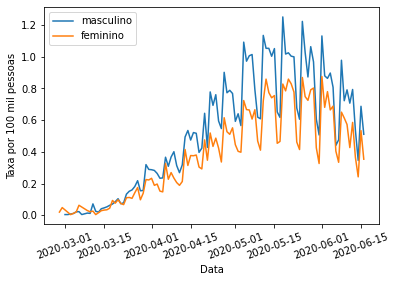

In [12]:
axis = plt.axes()
plt.plot(aux_m['DT_NOTIFIC'], aux_m['taxa'], label='masculino')
plt.plot(aux_f['DT_NOTIFIC'], aux_f['taxa'], label='feminino') 
#aux_m[['taxa', 'DT_NOTIFIC']].plot(x='DT_NOTIFIC', label='masculino', ax = axis)
#aux_f[['taxa', 'DT_NOTIFIC']].plot(x='DT_NOTIFIC', ax = axis, label='feminino')
axis.set_ylabel('Taxa por 100 mil pessoas')
axis.set_xlabel('Data')
plt.xticks(rotation=20)
plt.legend()
plt.savefig('../graficos/sexo_normalizado.svg', dpi=300)
plt.savefig('../graficos/sexo_normalizado.png', dpi=300)
plt.show()